In [2]:
import tensorflow as tf
(x_train,y_train), (x_test,y_test)= tf.keras.datasets.mnist.load_data()

6


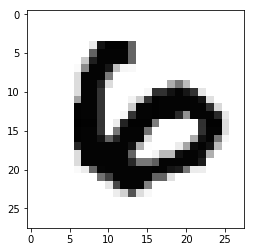

In [4]:
import matplotlib.pyplot as plt
image=9000
print(y_train[image])
plt.imshow(x_train[image],cmap='Greys')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

('x_train shape:', (60000, 28, 28, 1))
('Number of images in x_train', 60000)
('Number of images in x_test', 10000)


In [7]:

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
60000/60000 [==============================] - 48s 805us/step - loss: 0.2009 - acc: 0.9398
Epoch 2/10
60000/60000 [==============================] - 56s 929us/step - loss: 0.0820 - acc: 0.9749
Epoch 3/10
60000/60000 [==============================] - 43s 720us/step - loss: 0.0592 - acc: 0.9811
Epoch 4/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0445 - acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 42s 705us/step - loss: 0.0369 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 54s 906us/step - loss: 0.0306 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 45s 752us/step - loss: 0.0250 - acc: 0.9916
Epoch 8/10
60000/60000 [==============================] - 49s 821us/step - loss: 0.0220 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0193 - 

('Predicted Value : ', 7)
Input Value : 


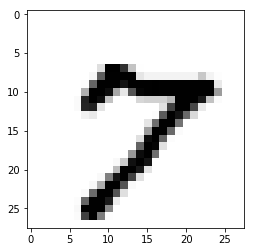

In [14]:
image_index = 9000

plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Value : ",pred.argmax())
print("Input Value : ")